In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf

import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
data = yf.download('BTC-USD', start='2021-01-01', end='2023-12-31')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782
...,...,...,...,...,...,...
2023-12-26,43599.847656,43603.175781,41676.488281,42520.402344,42520.402344,30026850982
2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014


In [4]:
# Training data

to_row = int(len(data) * 0.9)

train = data[:to_row]['Adj Close']
test = data[to_row:]['Adj Close']

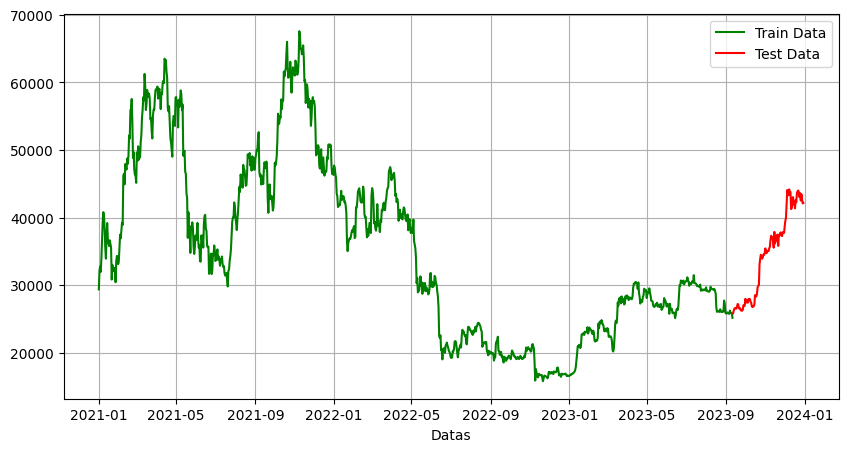

In [5]:
plt.figure(figsize=(10,5))
plt.grid()
plt.xlabel('Datas')
plt.plot(train, 'green', label='Train Data')
plt.plot(test, 'red', label='Test Data')
plt.legend()
plt.show()

In [6]:
model_predictions = []
n_test_obser = len(train)

In [8]:
history = [x for x in train]
predictions = []
for i in range(len(train)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[i]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

C:\Users\Michał\AppData\Local\Temp\ipykernel_2700\2731973027.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[i]


predicted=25163.063493, expected=25833.343750
predicted=25811.530776, expected=26228.324219
predicted=26225.439990, expected=26539.673828
predicted=26515.851362, expected=26608.693359
predicted=26627.616348, expected=26568.281250
predicted=26609.494852, expected=26534.187500
predicted=26560.182565, expected=26754.281250
predicted=26764.622946, expected=27211.117188
predicted=27211.506654, expected=27132.007812
predicted=27137.015459, expected=26567.632812
predicted=26582.429012, expected=26579.568359
predicted=26599.667324, expected=26579.390625
predicted=26584.066393, expected=26256.826172
predicted=26229.886779, expected=26298.480469
predicted=26278.909368, expected=26217.250000
predicted=26215.640545, expected=26352.716797
predicted=26336.490629, expected=27021.546875
predicted=27012.141684, expected=26911.720703
predicted=26918.763892, expected=26967.916016
predicted=26976.148801, expected=27983.750000
predicted=28013.696568, expected=27530.785156
predicted=27559.433958, expected=2

IndexError: index 110 is out of bounds for axis 0 with size 110

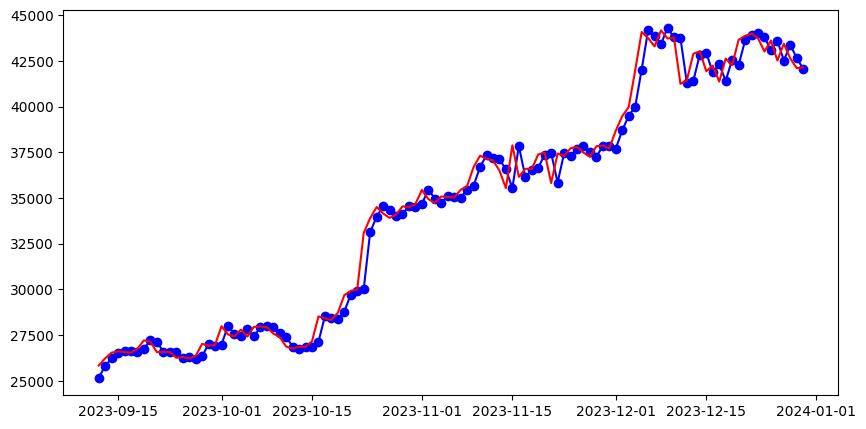

In [10]:
plt.figure(figsize=(10,5))

data_range = data[to_row:].index
plt.plot(data_range, predictions[:-1], label='predicted' , marker='o', color='blue')
plt.plot(data_range, test, color='red')
plt.show()